# Ten Years Stroke project

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pgmpy.estimators import HillClimbSearch, BicScore, AICScore
from pgmpy.models import BayesianNetwork

In [68]:
dataframe = pd.read_csv('tenyear_stroke.csv')
dataframe.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [69]:
continuous_data = dataframe[['age','totChol','sysBP','diaBP','BMI','cigsPerDay']]
discrete_data = dataframe[['male','prevalentStroke','diabetes','TenYearCHD']]

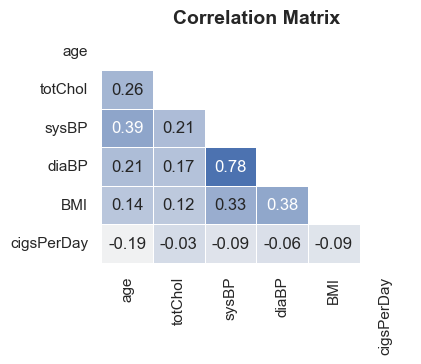

In [70]:
# Step 1: Calculate the correlation matrix
corr_matrix = continuous_data.corr()

plt.figure(figsize=(4, 3))  # Slightly larger for better readability
sns.set(style="white")
cmap=sns.color_palette("light:b", as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=0)

# Draw the heatmap with specified vmin and vmax
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    cbar=False
)

plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()


# Detect outliers and filter the space



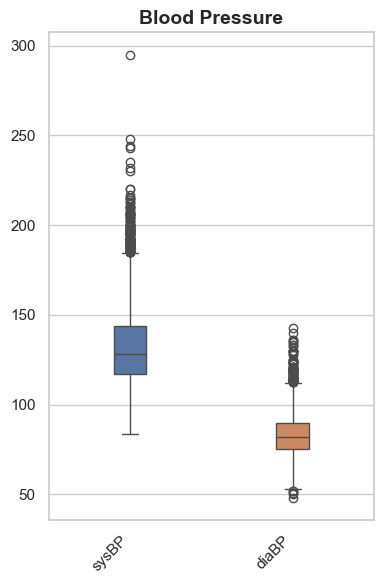

In [66]:
data_pr = continuous_data[['sysBP','diaBP']]

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named `df`
plt.figure(figsize=(4, 6))
sns.set(style="whitegrid")

sns.boxplot(data=data_pr,width=0.2)  # By default, boxplots are vertical

plt.title("Blood Pressure", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

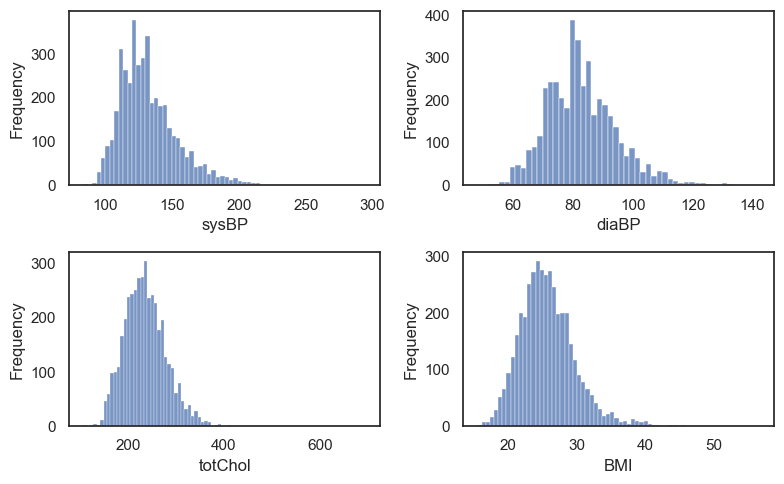

In [76]:
# Histogram plots
data_hist = continuous_data[['totChol','sysBP','diaBP','BMI']]
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
features = ['sysBP','diaBP','totChol','BMI']

# Flatten the 2D array of axes to make indexing easier
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(features):
    sns.histplot(data_hist[feature], kde=False, ax=axes[i])  # Change bins for granularity
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [167]:
from skimpy import skim 

skim(continuous_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4238   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA  ┃ NA %                 ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50  ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age         │   0 │                    0 │  49.58 │  8.572 │    32 │    42 │   49 │    56 │    70 │ ▃█▇▇▅▂ │  │
│ │ totChol     │  50 │    1.179801793298726 │  236.7 │  44.59 │   107 │   206 │  234 │   263 │   696 │  ▃█▁   │  │
│ │ sysBP       │   0 │                    0 │  132.4 │  22.04 │  83.5 │   117 │  128 │   144 │   295 │  ▄█▂   │  │
│ │ diaBP       │   0 │                    0 │  82.89 │  11.91 │    48 │    75 │   82 │ 89.88 │ 142.5 │  ▁▆█▂  │  │
│ │ BMI         │  19 │   0.4483246814535158 │   25.8 │   4.08 │ 15.54 │ 23.07 │ 25.4 │ 28.04 │  56.8 │  ▂█▂   │  │
│ │ cigsPerDay  │  29 │    0.684285040113261 │  9.003 │  11.92 │     0 │     0 │    0 │    20 │    70 │  █▃▁   │  │
│ └─────────────┴─────┴──────────────────────┴────────┴────────┴───────┴───────┴──────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [151]:
continuous_data_cl = continuous_data.dropna()

In [ ]:
# Age
continuous_data_cl = continuous_data_cl[(continuous_data_cl['age'] >= 35) & (continuous_data_cl['age'] <= 65)]
continuous_data_cl['age'] = pd.cut(continuous_data_cl.age,bins=[29,44,54,65],labels=[0,1,2],ordered=True).astype(int)

# Cholesterol-level
continuous_data_cl = continuous_data_cl[(continuous_data_cl['totChol'] >= 100) & (continuous_data_cl['totChol'] <= 500)]
continuous_data_cl['totChol'] = pd.cut(continuous_data_cl.totChol,bins=[99,199,239,500],labels=[0,1,2],ordered=True).astype(int)

# Body Mass Index 
continuous_data_cl = continuous_data_cl[(continuous_data_cl['BMI'] <= 40)]
continuous_data_cl['BMI'] = pd.cut(continuous_data_cl.BMI,bins=[14.,18.4,24.9,29.9,40],labels=[0,1,2,3],ordered=True).astype(int)

#Cigs Per Day 
continuous_data_cl = continuous_data_cl[(continuous_data_cl['cigsPerDay'] <= 40)]
continuous_data_cl['cigsPerDay'] = pd.cut(continuous_data_cl.cigsPerDay,bins=[-1,0,19,40],labels=[0,1,2],ordered=True).astype(int)





In [153]:
# Create a Blood pressure variable

bloodP= []

# Systolic-Pressure
continuous_data_cl = continuous_data_cl[(continuous_data_cl['sysBP'] >= 40) & (continuous_data_cl['sysBP'] <= 250)]
# Diastolic-Pressure
continuous_data_cl = continuous_data_cl[(continuous_data_cl['diaBP'] >= 40) &(continuous_data_cl['diaBP'] <= 140)]

for i,sys in enumerate(continuous_data_cl.sysBP.values):
    dia = continuous_data_cl.diaBP.values[i]

    if (sys<=90 and dia<=60):
        blood = 0
    elif (sys<=120 and dia<=80):
        blood = 1
    elif (sys<=140 and dia<=90):
        blood = 2
    else: 
        blood = 3
    bloodP.append(blood)
    
continuous_data_cl['BloodP'] = bloodP

In [165]:
continuous_data_cl.columns=['Age','TotC','SBP','DBP','BMI','CxD','BP']
discrete_data.columns = ['GEN','PStroke','Diab','TYS']

dataset = pd.concat([continuous_data_cl,discrete_data],axis=1)
dataset = dataset.drop(['SBP','DBP'],axis=1)

dataset = dataset.dropna()
dataset = dataset.astype('int')
dataset = dataset.astype('str')


dataset.head()

,Age,TotC,BMI,CxD,BP,GEN,PStroke,Diab,TYS
0,0,0,2,0,1,1,0,0,0
1,1,2,2,0,2,0,0,0,0
2,1,2,2,2,2,1,0,0,0
3,2,1,2,2,3,0,0,0,1
4,1,2,1,2,2,0,0,0,0


In [166]:
from pgmpy.estimators.CITests import chi_square

print(chi_square(X='CxD',Y='Diab', Z=[] ,data=dataset, significance_level = 0.05))

True


# Definition of the Network 

### Personal definition

In [13]:
# DIVIDE IN TRAIN AND TEST
from imblearn.over_sampling import SMOTE
X = dataset.drop(['TYS'],axis=1)
y = dataset[['TYS']]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4)
# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.25)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train = np.round(X_train).astype(int)

train_net_all = pd.concat([X_train,y_train],axis=1)
test_net_all =  pd.concat([X_test,y_test],axis=1)

In [14]:
edges_1 = [ ('A','BMI'),('GEN','BMI'),('SM','BMI'),
            ('BMI','GLU'),('BMI','C'),('A','C'),('A','GLU'),('GEN','C'),('GEN','GLU'),
            ('GLU','BP'),('C','BP'),
            ('GLU','D'),('GLU','PS'),('C','D'),('C','PS'),
            ('BP','D'),('BP','PS'),
            ('D','TYS'),('BP','TYS'),('PS','TYS')
        ]

model_1 = BayesianNetwork(edges_1)

from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the CPDs using MaximumLikelihoodEstimator
model_1.fit(train_net_all, estimator=MaximumLikelihoodEstimator)

model_1.check_model()

True

In [15]:
data_cut = dataset.drop(['BMI'],axis=1)
data_cut.head()

,A,C,GLU,BP,GEN,SM,PS,D,TYS
0,0,1,1,1,1,0,0,0,0
1,1,3,1,2,0,0,0,0,0
2,1,3,1,2,1,1,0,0,0
3,3,2,2,3,0,1,0,0,1
4,1,4,1,2,0,1,0,0,0


In [36]:
# DIVIDE IN TRAIN AND TEST
from imblearn.over_sampling import SMOTE

X = data_cut.drop(['TYS'],axis=1)
y = data_cut[['TYS']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3)
# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.2)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train = np.round(X_train).astype(int)

train_net = pd.concat([X_train,y_train],axis=1)
val_net = pd.concat([X_val,y_val],axis=1)
test_net =  pd.concat([X_test,y_test],axis=1)


In [37]:
edges_2 = [ ('A','BP'),('GEN','BP'),
            ('A','C'),('A','GLU'),('GEN','C'),('GEN','GLU'),
            ('C','BP'),('GLU','D'),('GLU','BP'),
            ('SM','BP'),
            ('BP','TYS'),('A','TYS'),('PS','TYS')
        ]

model_2 = BayesianNetwork(edges_2)

from pgmpy.estimators import MaximumLikelihoodEstimator
model_2.fit(train_net, estimator=MaximumLikelihoodEstimator)

model_2.check_model()

True

## Hill Search

In [38]:
# Set some boundaries

fixeed_edges = [('A','BP'),('GEN','BP'),('SM','BP'),('GLU','D'),('BP','TYS')]
forbidden_edges = [(node,'A') for node in train_net.columns if node !='BP'] + \
                  [(node,'GEN') for node in train_net.columns if node !='BP'] + \
                   [(node,'SM') for node in train_net.columns if node !='SM']

score = HillClimbSearch(train_net)

best_model = score.estimate(scoring_method=BicScore(train_net),max_indegree=5,
                            fixed_edges=fixeed_edges,black_list=forbidden_edges)

hill_model=BayesianNetwork(best_model.edges())

hill_model.fit(train_net, estimator=MaximumLikelihoodEstimator)

hill_model.check_model()


  0%|          | 0/1000000 [00:00<?, ?it/s]

True

In [39]:
bic = BicScore(val_net)

print(f'Model_2 BIC: {bic.score(model_2)}')
print(f'Model_hill BIC: {bic.score(hill_model)}')

Model_2 BIC: -3171.498025065326
Model_hill BIC: -1580.778573300148


# Making predictions and evaluate models
Test the accuracy of our 3 models to select the ones from which we will obtain informations

In [40]:
from pgmpy.inference import VariableElimination

true_values = []
predicted_probs = []

inference = VariableElimination(model_1)
keys_to_keep = [node for node in model_1.nodes()]


# Iterate over each row in the test set (assuming 'test_net' is your test data)
for index, row in val_net.iterrows():
    
    evidence = row.to_dict()
    evidence = {k: int(v) for k, v in evidence.items() if k in keys_to_keep}
    del evidence['TYS']

    remove_list = []
    for var in  model_1.nodes():
        if var not in evidence.keys():
            remove_list.append
    
    # Use the trained Bayesian network model to predict the probability distribution of 'Y'
    prediction = inference.query(variables=['TYS'], evidence=evidence)
    
    predicted_prob=prediction.values[1]
            
    # True value of 'Y' from the test set
    true_y = row['TYS']
    
    # Append true and predicted values
    true_values.append(true_y)
    predicted_probs.append(predicted_prob)

In [41]:
from sklearn.metrics import f1_score

# Initialize variables to track best threshold and its corresponding f1 score
best_threshold = 0
best_f1_weighted = 0

# Range of thresholds to test
thresholds = np.linspace(0, 1, 50)

# Store F1 scores for plotting
f1_scores = []

# Loop over thresholds to find the best one
for threshold in thresholds:
    # Classify labels based on the threshold
    predicted_values = ['1' if pred >= threshold else '0' for pred in predicted_probs]
    
    # Compute weighted F1 score
    f1_weighted = f1_score(true_values,predicted_values , pos_label='1')
    f1_scores.append(f1_weighted)
    
    # Update best threshold if this F1 score is better
    if f1_weighted > best_f1_weighted:
        best_f1_weighted = f1_weighted
        best_threshold = threshold

# Print the best threshold and corresponding weighted F1 score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Weighted F1 Score: {best_f1_weighted:.4f}")


Best Threshold: 0.12
Best Weighted F1 Score: 0.2828


## Evaluate on test set

In [42]:
from pgmpy.inference import VariableElimination

true_values = []
predicted_probs = []

inference = VariableElimination(model_1)
keys_to_keep = [node for node in model_1.nodes()]


# Iterate over each row in the test set (assuming 'test_net' is your test data)
for index, row in test_net.iterrows():
    
    evidence = row.to_dict()
    evidence = {k: int(v) for k, v in evidence.items() if k in keys_to_keep}
    del evidence['TYS']

    remove_list = []
    for var in model_1.nodes():
        if var not in evidence.keys():
            remove_list.append
    
    # Use the trained Bayesian network model to predict the probability distribution of 'Y'
    prediction = inference.query(variables=['TYS'], evidence=evidence)
    
    predicted_prob=prediction.values[1]
            
    # True value of 'Y' from the test set
    true_y = row['TYS']
    
    # Append true and predicted values
    true_values.append(true_y)
    predicted_probs.append(predicted_prob)

In [43]:
predicted_values = ['1' if pred >= best_threshold else '0' for pred in predicted_probs]

In [44]:
from sklearn.metrics import classification_report

report= classification_report(true_values,predicted_values,labels=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.88      0.27      0.42        81
           1       0.17      0.80      0.28        15

    accuracy                           0.35        96
   macro avg       0.52      0.54      0.35        96
weighted avg       0.77      0.35      0.39        96



In [46]:
# Computing the probability of bronc given smoke=no.
infer = VariableElimination(model_2)

glu_infer = infer.query(variables=['TYS'], evidence={'A':1})
print(glu_infer)

+--------+------------+
| TYS    |   phi(TYS) |
+========+============+
| TYS(0) |     0.8979 |
+--------+------------+
| TYS(1) |     0.1021 |
+--------+------------+
